## ** Let's illustrate how to train different binary classifiers using NLTK text corpus 'movie_reviews'. We will use python packages 'nltk' and 'sklearn'.**

In [ ]:
# source: https://www.nltk.org/book/ch06.html
# download movie review dataset
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
# import downloaded corpus
# prepare corpus (already tokenized)
from nltk.corpus import movie_reviews
import random

# Data Processing in Boolen format

*   List item
*   List item



In [ ]:
documents = [(list(movie_reviews.words(fileid)), category) \
             for category in movie_reviews.categories() \
             for fileid in movie_reviews.fileids(category)]
# print out the size of documents
print(len(documents))

# shuffle documents, reorganize the order of documents
random.shuffle(documents)

# split documents into training and test data
doc_train, doc_test = documents[100:], documents[:100]
# print out the size of training and test documents
print(len(doc_train), len(doc_test))

2000
1900 100


In [ ]:
# display category set
categories = set([c for d, c in doc_train])
print(categories)

# display example movie review and its category
print(doc_train[0][0])
print(doc_train[0][1])

{'neg', 'pos'}
['"', 'tarzan', 'and', 'the', 'lost', 'city', '"', 'is', 'one', 'of', 'the', 'most', 'anemic', 'movies', 'to', 'come', 'out', 'in', 'quite', 'a', 'while', '.', 'not', 'only', 'it', 'is', 'poorly', 'written', ',', 'badly', 'acted', ',', 'and', 'generally', 'incompetent', 'in', 'all', 'cinematic', 'areas', ',', 'it', 'is', 'thoroughly', 'uninspired', 'and', 'insipid', '.', 'unfortunately', ',', 'it', "'", 's', 'not', 'bad', 'in', 'the', 'way', 'great', ',', 'colossal', 'misfires', 'like', '"', 'heaven', "'", 's', 'gate', '"', '(', '1980', ')', 'or', '"', 'ishtar', '"', '(', '1987', ')', 'were', 'bad', '.', 'instead', ',', 'it', 'literally', 'drips', 'off', 'the', 'screen', 'like', 'a', 'movie', 'nobody', 'wanted', 'to', 'be', 'associated', 'with', ',', 'which', 'begs', 'the', 'question', 'of', 'why', 'it', 'was', 'made', 'in', 'the', 'first', 'place', '.', 'with', 'all', 'the', 'good', 'scripts', 'lying', 'around', 'hollywood', 'un', '-', 'produced', ',', 'how', 'does', 'n

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for']
38982
17
FreqDist({',': 73576, 'the': 72329, '.': 62373, 'a': 36146, 'and': 33790, 'of': 32240, 'to': 30203, "'": 28942, 'is': 23851, 'in': 20660, 's': 17543, '"': 16722, 'it': 15239, 'that': 15133, '-': 14744, ')': 11206, '(': 11098, ...})


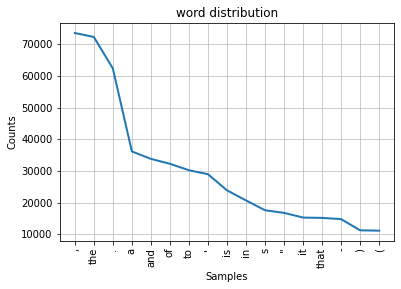

In [ ]:
# determine vocabulary
# get the word frequency distribution of training data
all_words = nltk.FreqDist(w.lower() for d, c in doc_train for w in d)
# get the top-2000 most common words
word_features = [word for word, num in all_words.most_common(2000)]
# display first 20 words in word_features
print(word_features[:20])

# display the size of all_words
all_word_num = len(all_words)
print(all_word_num)
# display top-k most common words, k in [0, 50) is generated randomly
k = random.randint(0, 50)
print(k)
all_words.pprint(k)
# plot the word frequency distribution of top-k most common words
all_words.plot(k, title='word distribution')

# define a function, return a dict, the type of key is str and value is Boolean
def document_features(document):
  document_words = set(document)
  features = {}
  for word in word_features:
    features[word] = (word in document_words)
  return features

In [ ]:
# convert documents into Boolean vectors
train_set = [(document_features(d), c) for (d,c) in doc_train]
test_set = [(document_features(d), c) for (d,c) in doc_test]


In [ ]:
# print example features
print(train_set[0][0])

{',': True, 'the': True, '.': True, 'a': True, 'and': True, 'of': True, 'to': True, "'": True, 'is': True, 'in': True, 's': True, '"': True, 'it': True, 'that': True, '-': True, ')': True, '(': True, 'as': True, 'with': True, 'for': True, 'his': True, 'this': True, 'film': True, 'he': True, 'i': True, 'but': True, 'on': True, 'are': True, 't': True, 'by': True, 'be': True, 'one': True, 'movie': True, 'an': True, 'who': True, 'not': True, 'you': False, 'from': True, 'at': True, 'was': True, 'have': True, 'they': True, 'has': True, 'her': True, 'all': True, 'there': True, '?': True, 'like': True, 'so': True, 'out': True, 'about': True, 'up': True, 'more': False, 'what': True, 'when': True, 'or': True, 'which': True, 'their': True, 'she': True, ':': True, 'some': False, 'just': True, 'can': True, 'if': True, 'we': True, 'him': True, 'into': True, 'even': True, 'only': True, 'no': True, 'than': True, 'good': True, 'time': True, 'most': True, 'its': True, 'will': True, 'story': True, 'would

# Train a Linear Support Vector machine and Random Forest classifier using NLTK and SKlearn

In [ ]:
# train an SVM model with training set
import nltk.classify
from sklearn.svm import LinearSVC

# wrapper sklearn classifier using nltk
classifier = nltk.classify.SklearnClassifier(LinearSVC())

# train the LinearSVC classifier using training data
classifier.train(train_set)


<SklearnClassifier(LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0))>

In [ ]:
# apply the trained SVM model for test set
accuracy = nltk.classify.accuracy(classifier, test_set)
print(accuracy)

0.83


In [ ]:
# train an RF model with training set
from sklearn.ensemble import RandomForestClassifier

classifier = nltk.classify.SklearnClassifier(RandomForestClassifier())
classifier.train(train_set)


<SklearnClassifier(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))>

In [ ]:
# apply the trained RF model for test set
accuracy = nltk.classify.accuracy(classifier, test_set)
print(accuracy)

0.84


# Data processing in Float format

In [ ]:
# convert documents into tfidf vectors
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

train_text = [' '.join(d) for (d,c) in doc_train]
train_tfidf = tfidf.fit_transform(train_text)
train_cats = [c for d, c in doc_train]

test_text = [' '.join(d) for (d,c) in doc_test]
test_tfidf = tfidf.transform(test_text)
test_cats = [c for d, c in doc_test]


# Train a Random Forest Classifier using SKlearn

In [ ]:
# train an RF model with training set
classifier = RandomForestClassifier()
classifier.fit(train_tfidf, train_cats)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# apply the trained RF model for test set
accuracy = classifier.score(test_tfidf, test_cats)
print(accuracy)

0.82
